In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Specify the CSV file path
csv_filename = 'clench_test.csv'

# Load the CSV file into a NumPy array
data = np.loadtxt(csv_filename, delimiter=',')

# Assuming each column represents 10 frames of 200 samples
num_frames = 50
samples_per_frame = 60

# Reshape each column to have dimensions (num_frames, samples_per_frame)
column1 = data[:, 0].reshape(num_frames, samples_per_frame)
column2 = data[:, 1].reshape(num_frames, samples_per_frame)
column3 = data[:, 2].reshape(num_frames, samples_per_frame)
column4 = data[:, 3].reshape(num_frames, samples_per_frame)
column5 = data[:, 4].reshape(num_frames, samples_per_frame)
column6 = data[:, 5].reshape(num_frames, samples_per_frame)

# Print the values of each column for the first frame
# print("Frame 1 - Column 1:", column1[0])
# print("Frame 1 - Column 2:", column2[0])
# print("Frame 1 - Column 3:", column3[0])

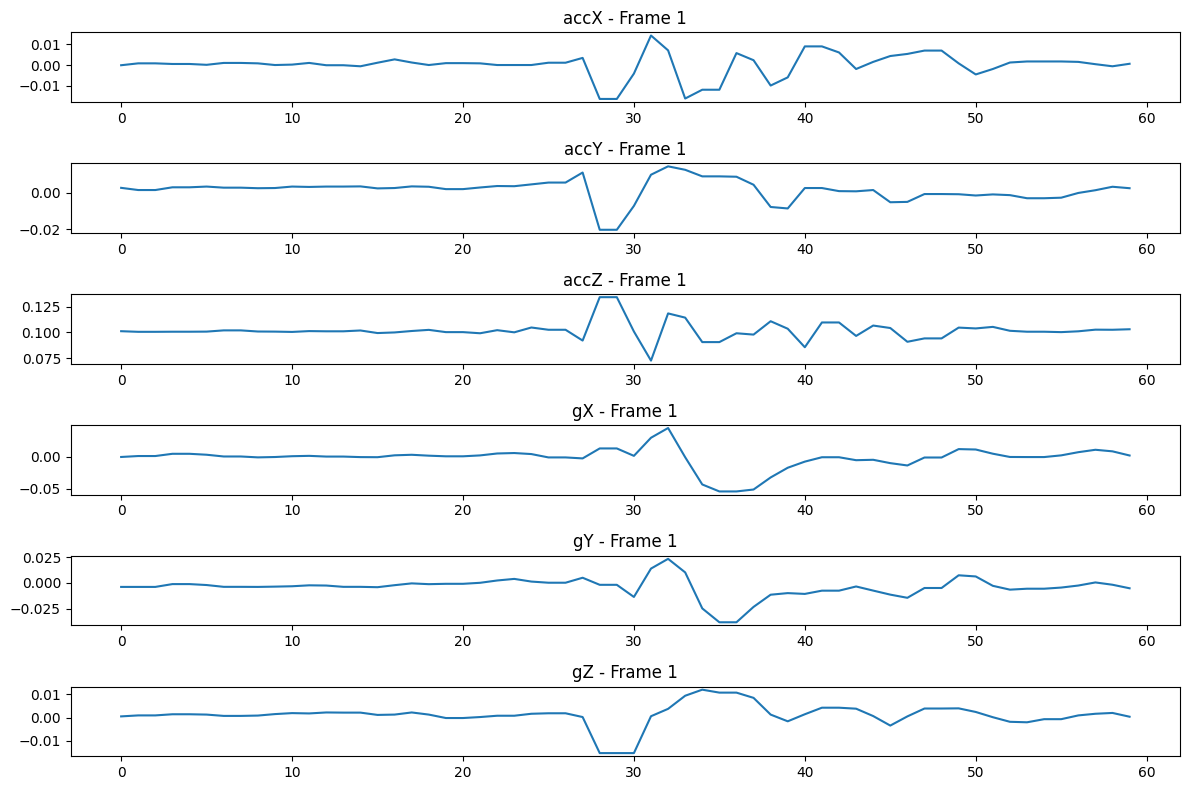

In [24]:
# Plot the values of each column for the first frame
time_steps = np.arange(samples_per_frame)

plt.figure(figsize=(12, 8))

plt.subplot(6, 1, 1)
plt.plot(time_steps, column1[0])
plt.title('accX - Frame 1')

plt.subplot(6, 1, 2)
plt.plot(time_steps, column2[0])
plt.title('accY - Frame 1')

plt.subplot(6, 1, 3)
plt.plot(time_steps, column3[0])
plt.title('accZ - Frame 1')

plt.subplot(6, 1, 4)
plt.plot(time_steps, column4[0])
plt.title('gX - Frame 1')

plt.subplot(6, 1, 5)
plt.plot(time_steps, column5[0])
plt.title('gY - Frame 1')

plt.subplot(6, 1, 6)
plt.plot(time_steps, column6[0])
plt.title('gZ - Frame 1')

plt.tight_layout()
plt.show()

In [49]:
# the list of gestures that data is available for
GESTURES = ["pinch", "clench"]
SAMPLES_PER_GESTURE = 60
NUM_GESTURES = len(GESTURES)
# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv(gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index]),
          (df['aY'][index]),
          (df['aZ'][index]),
          (df['gX'][index]),
          (df['gY'][index]),
          (df['gZ'][index]),
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

Processing index 0 for gesture 'pinch'.
	There are 50 recordings of the pinch gesture.
Processing index 1 for gesture 'clench'.
	There are 50 recordings of the clench gesture.
Data set parsing and preparation complete.


In [59]:
print(outputs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [60]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [61]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Epoch 1/100
60/60 [==============================] - 1s 8ms/step - loss: 0.2278 - mae: 0.4728 - val_loss: 0.2062 - val_mae: 0.4528
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1591 - mae: 0.3927 - val_loss: 0.1398 - val_mae: 0.3676
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0852 - mae: 0.2811 - val_loss: 0.0615 - val_mae: 0.2432
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0328 - mae: 0.1703 - val_loss: 0.0217 - val_mae: 0.1421
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0109 - mae: 0.0946 - val_loss: 0.0075 - val_mae: 0.0812
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0541 - val_loss: 0.0037 - val_mae: 0.0531
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0016 - mae: 0.0337 - val_loss: 0.0025 - val_mae: 0.0393
Epoch 8/100
60/60 [==============================] - 0s 5ms/step - loss: 8.4875e-04

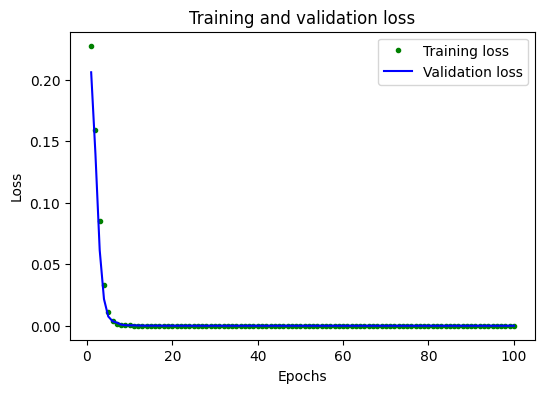

[6.0, 4.0]


In [67]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (6,4)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

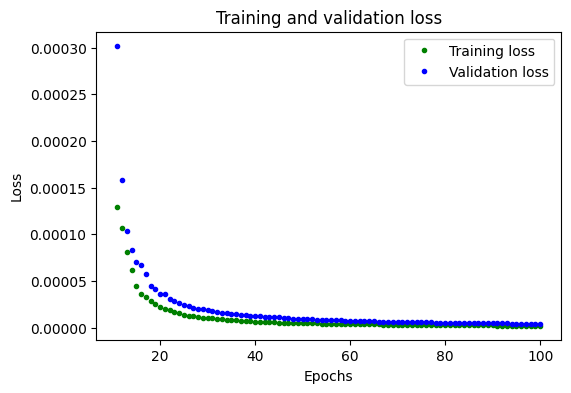

In [68]:
# graph the loss again skipping a bit of the start
SKIP = 10
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

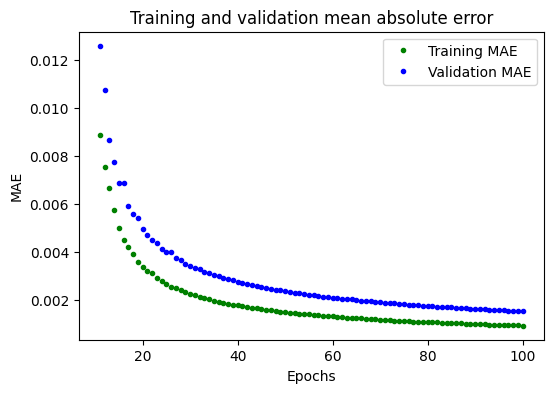

In [69]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


1/1 [==============================] - 0s 21ms/step
predictions =
 [[0.002 0.998]
 [0.    1.   ]
 [0.901 0.099]
 [0.003 0.997]
 [0.999 0.001]
 [0.001 0.999]
 [0.004 0.996]
 [0.991 0.009]
 [0.001 0.999]
 [0.008 0.992]
 [0.001 0.999]
 [1.    0.   ]
 [0.001 0.999]
 [0.001 0.999]
 [0.001 0.999]
 [1.    0.   ]
 [0.001 0.999]
 [1.    0.   ]
 [0.001 0.999]
 [1.    0.   ]]
actual =
 [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


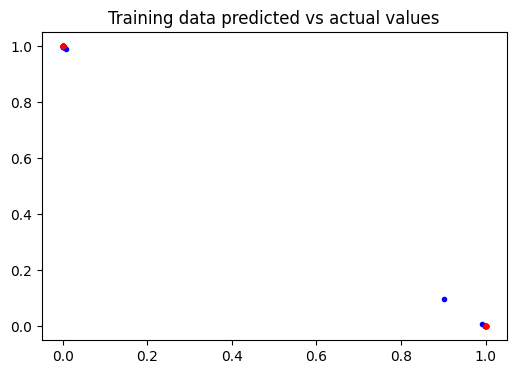

In [70]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(predictions[:, 0], predictions[:, 1], 'b.', label='Predicted')
plt.plot(outputs_test[:, 0], outputs_test[:, 1], 'r.', label='Actual')
plt.show()